# Wellbeing Analysis Project

This notebook examines the relationship between lifestyle factors and wellbeing factors through three research questions and what we hope to find:
- Q1: Days without social media vs. Wellbeing Score
- Q2: Social media platform user demographics and screen time
- Q3: Predictors of stress levels

## Table of Contents

1. [Setup & Imports](#1-setup--imports)
2. [Data Loading](#2-data-loading)
3. [Data Understanding](#3-data-understanding)
4. [Data Cleaning](#4-data-cleaning)
5. [Question 1: Days Without Social Media and Wellbeing](#5-question-1)
6. [Question 2: Social Media Platform Demographics](#6-question-2)
7. [Question 3: Stress Level Predictors](#7-question-3)
8. [Summary and Conclusions](#8-summary-and-conclusions)

## 1. Setup & Imports

In [ ]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning







## 2. Data Loading

In [ ]:
# Load the dataset
#df = pd.read_csv('our_dataset.csv')



## 3. Data Understanding

### 3.1 First Look at the Data

In [ ]:
# Display first few rows


### 3.2 Dataset Information

In [ ]:
# Get basic information about the dataset


In [ ]:
# Column names


### 3.3 Statistical Summary

In [ ]:
# Statistical summary of numerical columns


## What This Check Tells Us:
### What Each Check Means:

- count, min max std etc through our columns

### 3.4 Check for Data Quality Issues

In [ ]:
# Check for missing values


In [ ]:
# Check for duplicate rows



# Check value ranges for key variables
Checking min max for each:
Days_Without_Social_Media: 
Daily_Screen_Time: 
Age:

## 4. Data Cleaning

### 4.1 Create a Working Copy

In [ ]:
# Create a copy to preserve original data
df_clean = df.copy()


### 4.2 Create Wellbeing Score Composite

In [ ]:
# Create composite Wellbeing Score
# Wellbeing Score = f(Happiness_Index, Sleep_Quality, Exercise_Frequency, Stress_Level)



### 4.6 Save Cleaned Data

In [ ]:
# Save cleaned dataset
df_clean.to_csv('wellbeing_data_cleaned.csv', index=False)


## Data cleaning - what we've done so far

Missing values if any 
Duplicates removed if any 
Outliers if any
Wellbeing Score created  
Cleaned data saved

# start from here

* resume work with cleaned data start here:*

In [ ]:
# Load cleaned data
# df_clean = pd.read_csv('wellbeing_data_cleaned.csv')
# create a working copy
df_working = df_clean.copy() # so you don't mess up the cleaned data

## 5. Question 1: Days Without Social Media and Wellbeing

**Research Question:** To what extent is the number of Days_Without_Social_Media related to an individual's overall Wellbeing_Score?

### 5.1 analysis

In [ ]:
# Distribution of Days Without Social Media

In [ ]:
# Visualise distributions


# Days Without Social Media


# Wellbeing Score




### 5.2 Analysis

In [ ]:
# Calculate correlation


### 5.3 

In [ ]:
# which ever charts you want to plot


# same format as 5.2




### 5.4 Analysis

In [ ]:
# Analyse relationship with each wellbeing component


In [ ]:
# Visualise 


### 5.5 Key Findings - Question 1

**Summary:**



## 6. Question 2: Social Media Platform Demographics

**Research Question:** What is the typical Age and Gender profile for users of different Social_Media_Platform, and how does their average Daily_Screen_Time compare?

### 6.1 Platform Overview

In [ ]:
# Get unique platforms and user counts


### 6.2 Age Profile by Platform

In [ ]:
# Calculate age statistics by platform



In [ ]:
# Visualise age distribution by platform


### 6.3 Gender Profile by Platform

In [ ]:
# Gender distribution by platform


In [ ]:
# Visualise gender distribution


### 6.4 Daily Screen Time by Platform

In [ ]:
# Calculate screen time statistics by platform


### 6.5 Visualisation: Screen Time Comparison

In [ ]:
# Box plot of screen time by platform


In [ ]:
# Bar chart of average screen time


### 6.6 Combined Demographics Summary

In [ ]:
# 

### 6.7 Key Findings - Question 2

**Summary:**



## 7. Question 3: Stress Level Predictors

**Research Question:** What are the most significant predictors of a user's Stress_Level, and can a model accurately predict whether a user falls into the high or low stress categories based on lifestyle factors?

### 7.1 Create Target Variable Categories

In [ ]:
# Create binary stress categories (High/Low)
# Adjust threshold based on our data

### 7.2 Select Predictor Variables

In [ ]:
# Define lifestyle factor predictors
    'Age',
    'Daily_Screen_Time',
    'Days_Without_Social_Media',
    'Exercise_Frequency',
    'Sleep_Quality',
    'Happiness_Index'
    # Add other relevant lifestyle factors


### 7.3 Exploratory Data Analysis for Stress

In [ ]:
# Compare predictors across stress categories

In [ ]:
# Visualise predictor distributions by stress category


### 7.4 Correlation Analysis

In [ ]:
# Calculate correlations with stress level


In [ ]:
# Visualise correlation heatmap


### 7.5 Prepare Data for Machine Learning
### either add your imports here or at the top of notebook

In [45]:
# Imports
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Prepare y and x variables

# Load cleaned data
df = pd.read_csv('../data/socialmedia_clean.csv')

# PREDICTORS
# Drop target + ID column + Wellbeing_Score (as it includes "stress level" - target)
df_Xclean = df.drop(columns=["User_ID", "Wellbeing_Score", "Stress_Level(1-10)"], errors="ignore")
# One-hot encode categorical features automatically
X = pd.get_dummies(df_Xclean)

# TARGET
y = df["Stress_Level(1-10)"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

FileNotFoundError: [Errno 2] No such file or directory: '../data/socialmedia_clean.csv'

### 

### 7.6 Feature Importance Analysis

In [35]:
# Visualise feature importance
# Train model
rf = RandomForestRegressor()
rf.fit(X, y)

# Feature importance
importances = pd.Series(rf.feature_importances_, index=X.columns)

# Sort smallest → largest
importances = importances.sort_values()

print(importances)

Social_Media_Platform_Facebook       0.005882
Gender_Other                         0.006075
Gender_Female                        0.007007
Social_Media_Platform_YouTube        0.007582
Gender_Male                          0.008494
Social_Media_Platform_Instagram      0.010602
Social_Media_Platform_TikTok         0.010670
Social_Media_Platform_X (Twitter)    0.011638
Social_Media_Platform_LinkedIn       0.011733
Sleep_Quality(1-10)                  0.027039
Exercise_Frequency(week)             0.036786
Days_Without_Social_Media            0.046941
Age                                  0.063100
Daily_Screen_Time(hrs)               0.287560
Happiness_Index(1-10)                0.458891
dtype: float64


### 7.7 Model Building - Random Forest

In [36]:
# Train random forest model
model = RandomForestRegressor(random_state=42)

# Add cross-validation
cv_scores = cross_val_score(
    model, X_train, y_train, cv=5, scoring="neg_mean_squared_error"
)

rmse_scores = np.sqrt(-cv_scores)

print("CV RMSE scores:", rmse_scores)
print("Average CV RMSE:", rmse_scores.mean())

# Final Training and Test Evaluation
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
test_mae  = mean_absolute_error(y_test, y_pred)
test_r2   = r2_score(y_test, y_pred)

print("RF Test RMSE:", test_rmse)
print("RF Test MAE:", test_mae)
print("RF Test R2:", test_r2)

# save model in variable
RFmodel = model

CV RMSE scores: [0.9847798  0.95765273 1.02343478 0.97432733 0.93490173]
Average CV RMSE: 0.975019274490012
RF Test RMSE: 0.9516942786420437
RF Test MAE: 0.8038
RF Test R2: 0.6239320710845374


### 7.8 Model Building - GradientBoostingRegressor

In [37]:
# Train GradientBoostingRegressor model
model = GradientBoostingRegressor()

# Cross-validation print (RMSE)
print("GBR CV RMSE:", rmse_scores)
print("GBR Avg CV RMSE:", rmse_scores.mean())

# Final Training and Test Evaluation
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("GBR Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("GBR Test MAE:", mean_absolute_error(y_test, y_pred))
print("GBR Test R2:", r2_score(y_test, y_pred))

# save model in variable
GBRmodel = model

GBR CV RMSE: [0.9847798  0.95765273 1.02343478 0.97432733 0.93490173]
GBR Avg CV RMSE: 0.975019274490012
GBR Test RMSE: 0.9510357716755573
GBR Test MAE: 0.8055316384122859
GBR Test R2: 0.6244523173033869


### 7.9 Model Building - XGBoost Regressor

In [38]:
# Train XGBoost Regressor model
model = XGBRegressor(
    random_state=42,
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6
)

# Cross-validation print (RMSE)
print("XGB CV RMSE:", rmse_scores)
print("XGB Avg CV RMSE:", rmse_scores.mean())

# Final Training and Test Evaluation
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("XGB Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("XGB Test MAE:", mean_absolute_error(y_test, y_pred))
print("XGB Test R2:", r2_score(y_test, y_pred))

# save model in variable
XBGRmodel = model

XGB CV RMSE: [0.9847798  0.95765273 1.02343478 0.97432733 0.93490173]
XGB Avg CV RMSE: 0.975019274490012
XGB Test RMSE: 1.0829579384636994
XGB Test MAE: 0.8927165675163269
XGB Test R2: 0.5130385747875993


### 7.10 Model Building - Ridge Regression

In [39]:
# Train Ridge Regression model
model = Pipeline([
    ("scaler", StandardScaler()),
    ("ridge", Ridge(alpha=1.0))
])

# Cross-validation print (RMSE)
print("Ridge CV RMSE:", rmse_scores)
print("Ridge Avg CV RMSE:", rmse_scores.mean())

# Final Training and Test Evaluation
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Ridge Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Ridge Test MAE:", mean_absolute_error(y_test, y_pred))
print("Ridge Test R2:", r2_score(y_test, y_pred))

# save model in variable
RRmodel = model

Ridge CV RMSE: [0.9847798  0.95765273 1.02343478 0.97432733 0.93490173]
Ridge Avg CV RMSE: 0.975019274490012
Ridge Test RMSE: 0.96557102575416
Ridge Test MAE: 0.8105767950835417
Ridge Test R2: 0.6128851495698635


### 7.11 Model Comparison Summary

In [40]:
# List of models
models = {
    "Random Forest": RFmodel,
    "XGBoost": XBGRmodel,
    "Ridge Regression": RRmodel,
    "Gradient Boosting": GBRmodel
}

# Prepare results
results = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        "Model": name,
        "Test RMSE": round(rmse, 4),
        "Test MAE": round(mae, 4),
        "Test R²": round(r2, 4)
    })

# Create DataFrame
results_df = pd.DataFrame(results)

# Sort by RMSE ascending (best first)
results_df = results_df.sort_values(by="Test RMSE")
results_df.reset_index(drop=True, inplace=True)

print(results_df)

               Model  Test RMSE  Test MAE  Test R²
0  Gradient Boosting     0.9510    0.8055   0.6245
1      Random Forest     0.9517    0.8038   0.6239
2   Ridge Regression     0.9656    0.8106   0.6129
3            XGBoost     1.0830    0.8927   0.5130


#### The best metrics shows Random Forest Model.

### 7.12 Tweaking best Model with Hyperparameters using GridSearchCV

In [41]:
# Model RandomForest
finalModel = RandomForestRegressor(random_state=42)

# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Grid search with 5-fold CV (neg_mean_squared_error)
grid_search = GridSearchCV(
    estimator=finalModel,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

# Cross-Validation RMSE of best model
best_finalModel = grid_search.best_estimator_

cv_scores = cross_val_score(
    best_finalModel, X_train, y_train, cv=5, scoring='neg_mean_squared_error'
)
cv_rmse = np.sqrt(-cv_scores)
print("CV RMSE scores:", cv_rmse)
print("Average CV RMSE:", cv_rmse.mean())

# Final Training and Test Evaluation
best_finalModel.fit(X_train, y_train)
y_pred = best_finalModel.predict(X_test)

test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
test_mae = mean_absolute_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

print("Test RMSE:", test_rmse)
print("Test MAE:", test_mae)
print("Test R2:", test_r2)

Best Hyperparameters: {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
CV RMSE scores: [0.91940534 0.96543982 1.02872509 0.94629092 0.93682923]
Average CV RMSE: 0.9593380788540641
Test RMSE: 0.9158792079806802
Test MAE: 0.7799022772253277
Test R2: 0.6517045658481488


### 7.13 Best Model Mistake Visualisation

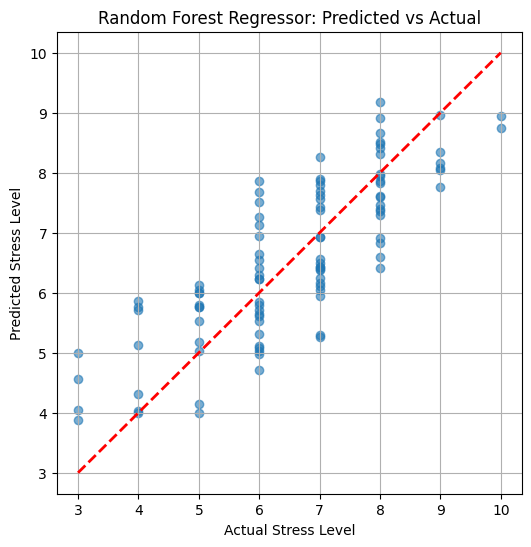

In [42]:
# Random Forest Visualisation: Predicted vs Actual Plot
y_pred = best_finalModel.predict(X_test)

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2)  # perfect prediction line
plt.xlabel("Actual Stress Level")
plt.ylabel("Predicted Stress Level")
plt.title("Random Forest Regressor: Predicted vs Actual")
plt.grid(True)
plt.show()

### 7.12 Key Findings - Question 3

**Summary:**



## 8. Summary and Conclusions

### 8.1 Project Overview

same as start of notebook

### 8.2 Key Findings Summary

**Question 1: Days Without Social Media and Wellbeing**


**Question 2: Platform Demographics**


**Question 3: Stress Predictors**
-

### 8.3 Cross-Question Insights



### 8.4 Limitations



### 8.5 Recommendations

**For Individuals:**


**For Future Research:**


## credits